In [ ]:
pip install --upgrade numexpr

In [ ]:
pip install ucimlrepo

In [ ]:
pip install seaborn


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes)
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

# metadata
print(predict_students_dropout_and_academic_success.metadata)

# variable information
print(predict_students_dropout_and_academic_success.variables)


{'uci_id': 697, 'name': "Predict students' dropout and academic success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Other', '

In [ ]:
X.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [ ]:
#Discretizar variable objetivo
#Correlacion con variable objetivo
#Graduate = 2
#Enrolled = 1
#Dropout= 0
def ponerNumerico(row):
    if row["Target"] == 'Dropout':
        row["TargetN"] = 0

    elif row["Target"] == 'Graduate':
        row["TargetN"] = 2
    else:
        row["TargetN"] = 1
    return row

y = y.apply(ponerNumerico ,axis = 1)

In [ ]:
#Se revisan valores faltantes
X.isna().sum()

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [ ]:
#Se revisan typos
valoresPorColumna = {}
for columns in X.columns:
    valoresPorColumna[columns]= X[columns].unique()


In [ ]:
#Estadisticas descriptivas variables demograficas de interes
variables =['Age at enrollment',"Marital Status", 'International',"Gender","Mother's occupation", "Father's occupation" ,"Previous qualification","Educational special needs"]
X[variables].describe()

,Age at enrollment,Marital Status,International,Gender,Mother's occupation,Father's occupation,Previous qualification,Educational special needs
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,23.265145,1.178571,0.024864,0.351718,10.960895,11.032324,4.577758,0.011528
std,7.587816,0.605747,0.155729,0.477560,26.418253,25.263040,10.216592,0.106760
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,19.000000,1.000000,0.000000,0.000000,4.000000,4.000000,1.000000,0.000000
50%,20.000000,1.000000,0.000000,0.000000,5.000000,7.000000,1.000000,0.000000
75%,25.000000,1.000000,0.000000,1.000000,9.000000,9.000000,1.000000,0.000000
max,70.000000,6.000000,1.000000,1.000000,194.000000,195.000000,43.000000,1.000000


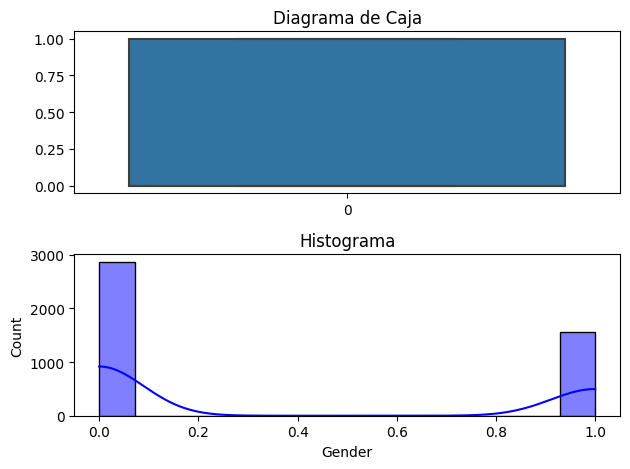

In [ ]:
#Diagrama de caja e histograma
import seaborn as sns
import matplotlib.pyplot as plt

variable = "Gender"
plt.subplot(2, 1, 1)  # 1 fila, 2 columnas, gráfico 1 (diagrama de caja)
sns.boxplot(X[variable])
plt.title('Diagrama de Caja')

# Crear un histograma
plt.subplot(2, 1, 2)  # 1 fila, 2 columnas, gráfico 2 (histograma)
sns.histplot(X[variable], kde=True, color='blue')
plt.title('Histograma')

plt.tight_layout()  # Para asegurarse de que los gráficos no se superpongan
plt.show()

In [ ]:
#Matriz de correlaciones
variables =['Age at enrollment',"Marital Status", 'International',"Gender","Mother's occupation", "Father's occupation" ,"Previous qualification","Educational special needs"]
X[variables].corr(method = "kendall")

,Age at enrollment,Marital Status,International,Gender,Mother's occupation,Father's occupation,Previous qualification,Educational special needs
Age at enrollment,1.000000,0.412082,0.017141,0.164039,0.079789,0.028499,0.318860,-0.026150
Marital Status,0.412082,1.000000,-0.029834,0.014028,0.105615,0.049605,0.180760,-0.031887
International,0.017141,-0.029834,1.000000,-0.026415,0.028099,0.014610,-0.039641,-0.003646
Gender,0.164039,0.014028,-0.026415,1.000000,-0.020524,-0.026629,0.080000,-0.017461
Mother's occupation,0.079789,0.105615,0.028099,-0.020524,1.000000,0.401612,-0.008335,-0.014032
Father's occupation,0.028499,0.049605,0.014610,-0.026629,0.401612,1.000000,-0.002079,-0.004828
Previous qualification,0.318860,0.180760,-0.039641,0.080000,-0.008335,-0.002079,1.000000,-0.021978
Educational special needs,-0.026150,-0.031887,-0.003646,-0.017461,-0.014032,-0.004828,-0.021978,1.000000


In [ ]:
import scipy.stats as stats
#Matriz de p-valores
variables =['Age at enrollment',"Marital Status", 'International',"Gender","Mother's occupation", "Father's occupation" ,"Previous qualification","Educational special needs"]
matriz = pd.DataFrame(np.zeros((len(variables),len(variables))))
matriz.set_index(pd.Index(variables), inplace = True)
matriz.columns = variables

for index in matriz.index:
    for column in matriz.columns:
        coeficiente_tau, p_valor = stats.kendalltau( X[index],X[column])
        matriz.loc[index,column]= p_valor
matriz

,Age at enrollment,Marital Status,International,Gender,Mother's occupation,Father's occupation,Previous qualification,Educational special needs
Age at enrollment,0.000000e+00,2.761844e-226,0.186585,1.279792e-36,3.518471e-12,1.082666e-02,5.060736e-142,0.043918
Marital Status,2.761844e-226,0.000000e+00,0.044767,3.453799e-01,9.166269e-16,1.078059e-04,3.634926e-36,0.031959
International,1.865854e-01,4.476721e-02,0.000000,7.895967e-02,3.449640e-02,2.594711e-01,6.475768e-03,0.808427
Gender,1.279792e-36,3.453799e-01,0.078960,0.000000e+00,1.225315e-01,3.985336e-02,3.916642e-08,0.245528
Mother's occupation,3.518471e-12,9.166269e-16,0.034496,1.225315e-01,0.000000e+00,2.113290e-269,5.171812e-01,0.291070
Father's occupation,1.082666e-02,1.078059e-04,0.259471,3.985336e-02,2.113290e-269,0.000000e+00,8.683609e-01,0.709448
Previous qualification,5.060736e-142,3.634926e-36,0.006476,3.916642e-08,5.171812e-01,8.683609e-01,0.000000e+00,0.131167
Educational special needs,4.391801e-02,3.195893e-02,0.808427,2.455275e-01,2.910697e-01,7.094478e-01,1.311672e-01,0.000000


In [ ]:
X.columns

Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [ ]:
#Discretizar porcentaje examenes aprobados
# 0- no presento examenes
#1- [0%-25%)
#2- 25%-50%
# 50%-75%
#75%-100%
def discretizar_porcentajeExamenesAprobados(row):
    if row['Curricular units 1st sem (evaluations)']==0:
        row["% of approved evaluations 1st sem"] = 0
    else:
        porcentaje = row['Curricular units 1st sem (approved)']/row['Curricular units 1st sem (evaluations)']
        if porcentaje >= 0.75:
            row["% of approved evaluations 1st sem"] = 4
        elif porcentaje >= 0.50:
            row["% of approved evaluations 1st sem"] = 3
        elif porcentaje >= 0.25:
            row["% of approved evaluations 1st sem"] = 2
        else:
            row["% of approved evaluations 1st sem"] = 1

    if row['Curricular units 2nd sem (evaluations)']==0:
        row["% of approved evaluations 2nd sem"] = 0
    else:
        porcentaje = row['Curricular units 2nd sem (approved)']/row['Curricular units 2nd sem (evaluations)']
        if porcentaje >= 0.75:
            row["% of approved evaluations 2nd sem"] = 4
        elif porcentaje >= 0.50:
            row["% of approved evaluations 2nd sem"] = 3
        elif porcentaje >= 0.25:
            row["% of approved evaluations 2nd sem"] = 2
        else:
            row["% of approved evaluations 2nd sem"] = 1

    return row

X = X.apply(discretizar_porcentajeExamenesAprobados ,axis = 1)


In [ ]:
X.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,% of approved evaluations 1st sem,% of approved evaluations 2nd sem
0,1.0,17.0,5.0,171.0,1.0,1.0,122.0,1.0,19.0,12.0,...,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74,0.0,0.0
1,1.0,15.0,1.0,9254.0,1.0,1.0,160.0,1.0,1.0,3.0,...,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79,4.0,4.0
2,1.0,1.0,5.0,9070.0,1.0,1.0,122.0,1.0,37.0,37.0,...,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74,0.0,0.0
3,1.0,17.0,2.0,9773.0,1.0,1.0,122.0,1.0,38.0,37.0,...,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12,4.0,3.0
4,2.0,39.0,1.0,8014.0,0.0,1.0,100.0,1.0,37.0,38.0,...,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79,3.0,4.0


In [ ]:
# 0- 95-120
# 1- 120-160
# 2- 160-200

def discretizar_resultados_examenes(row):
  if row["Previous qualification (grade)"]>= 160:
    row["Previous qualification (grade) performance"] = 2

  elif row["Previous qualification (grade)"]>= 120 :
    row["Previous qualification (grade) performance"] = 1

  else:
    row["Previous qualification (grade) performance"] = 0

  if row["Admission grade"]>= 160:
    row["Admission grade performance"] = 2

  elif row["Admission grade"]>= 120 :
    row["Admission grade performance"] = 1

  else:
    row["Admission grade performance"] = 0

  return row

X = X.apply(discretizar_resultados_examenes, axis = 1)

In [ ]:
X.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,% of approved evaluations 1st sem,% of approved evaluations 2nd sem,Previous qualification (grade) performance,Admission grade performance
0,1.0,17.0,5.0,171.0,1.0,1.0,122.0,1.0,19.0,12.0,...,0.0,0.000000,0.0,10.8,1.4,1.74,0.0,0.0,1.0,1.0
1,1.0,15.0,1.0,9254.0,1.0,1.0,160.0,1.0,1.0,3.0,...,6.0,13.666667,0.0,13.9,-0.3,0.79,4.0,4.0,2.0,1.0
2,1.0,1.0,5.0,9070.0,1.0,1.0,122.0,1.0,37.0,37.0,...,0.0,0.000000,0.0,10.8,1.4,1.74,0.0,0.0,1.0,1.0
3,1.0,17.0,2.0,9773.0,1.0,1.0,122.0,1.0,38.0,37.0,...,5.0,12.400000,0.0,9.4,-0.8,-3.12,4.0,3.0,1.0,0.0
4,2.0,39.0,1.0,8014.0,0.0,1.0,100.0,1.0,37.0,38.0,...,6.0,13.000000,0.0,13.9,-0.3,0.79,3.0,4.0,0.0,1.0


In [ ]:
import scipy.stats as stats

# Ejemplo de dos listas de datos
# Calcular el coeficiente de correlación de tau de Kendall
coeficiente_tau, p_valor = stats.kendalltau( X["Previous qualification"],X["International"])
print(coeficiente_tau, p_valor)

-0.039641313693610764 0.006475767712953553


In [ ]:
correlaciones = {}
for column in X.columns:
    coeficiente_tau, p_valor = stats.kendalltau( X[column],y["TargetN"])
    correlaciones[column]= (coeficiente_tau, p_valor)


In [ ]:
X.columns

Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [ ]:
Variables = ['Marital Status', "Previous qualification", "Scholarship holder",  'Tuition fees up to date', 'Gender','% of approved evaluations 1st sem', '% of approved evaluations 2nd sem',
'Previous qualification (grade) performance', 'Admission grade performance',"Mother's occupation","Father's occupation" , 'Age at enrollment']

In [ ]:
X_definitivo = X[Variables]
X_definitivo["Target"] = y["TargetN"]

<ipython-input-159-6c6cae933d19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_definitivo["Target"] = y["TargetN"]


In [ ]:
X_definitivo

,Marital Status,Previous qualification,Scholarship holder,Tuition fees up to date,Gender,% of approved evaluations 1st sem,% of approved evaluations 2nd sem,Previous qualification (grade) performance,Admission grade performance,Mother's occupation,Father's occupation,Age at enrollment,Target
0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,5.0,9.0,20.0,0
1,1.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,1.0,3.0,3.0,19.0,2
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,9.0,9.0,19.0,0
3,1.0,1.0,0.0,1.0,0.0,4.0,3.0,1.0,0.0,5.0,3.0,20.0,2
4,2.0,1.0,0.0,1.0,0.0,3.0,4.0,0.0,1.0,9.0,9.0,45.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1.0,1.0,0.0,1.0,1.0,3.0,3.0,1.0,1.0,5.0,4.0,19.0,2
4420,1.0,1.0,0.0,0.0,0.0,4.0,2.0,1.0,0.0,9.0,9.0,18.0,0
4421,1.0,1.0,1.0,1.0,0.0,4.0,1.0,1.0,1.0,9.0,9.0,30.0,0
4422,1.0,1.0,1.0,1.0,0.0,4.0,4.0,2.0,1.0,7.0,4.0,20.0,2


In [ ]:
pip install pgmpy

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import numpy as np
import scipy
from sklearn.model_selection import train_test_split
import pandas as pd
import pyparsing
import torch
import statsmodels
import tqdm
import joblib

In [ ]:
X_definitivo

,Marital Status,Previous qualification,Scholarship holder,Tuition fees up to date,Gender,% of approved evaluations 1st sem,% of approved evaluations 2nd sem,Previous qualification (grade) performance,Admission grade performance,Mother's occupation,Father's occupation,Age at enrollment,Target
0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,5.0,9.0,20.0,0
1,1.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,1.0,3.0,3.0,19.0,2
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,9.0,9.0,19.0,0
3,1.0,1.0,0.0,1.0,0.0,4.0,3.0,1.0,0.0,5.0,3.0,20.0,2
4,2.0,1.0,0.0,1.0,0.0,3.0,4.0,0.0,1.0,9.0,9.0,45.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1.0,1.0,0.0,1.0,1.0,3.0,3.0,1.0,1.0,5.0,4.0,19.0,2
4420,1.0,1.0,0.0,0.0,0.0,4.0,2.0,1.0,0.0,9.0,9.0,18.0,0
4421,1.0,1.0,1.0,1.0,0.0,4.0,1.0,1.0,1.0,9.0,9.0,30.0,0
4422,1.0,1.0,1.0,1.0,0.0,4.0,4.0,2.0,1.0,7.0,4.0,20.0,2


In [ ]:
model = BayesianNetwork ([("Age at enrollment", "Marital Status") , ("Gender", "Previous qualification"),
 ("Marital Status","Previous qualification"),("Father's occupation","Scholarship holder"),
                          ("Mother's occupation","Scholarship holder"),
                           ("Previous qualification","Tuition fees up to date"),
                          ("Tuition fees up to date","Target"),
                          ("Previous qualification","Previous qualification (grade) performance"),
                          ("Previous qualification (grade) performance","Scholarship holder"),
                           ("Previous qualification (grade) performance","Admission grade performance"),
                          ("Scholarship holder","Target"),("Admission grade performance","% of approved evaluations 1st sem"),
                           ("% of approved evaluations 1st sem","% of approved evaluations 2nd sem"),
                          ("% of approved evaluations 2nd sem","Target")])



In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator
emv = MaximumLikelihoodEstimator(model, data=X_definitivo)

# Estimar para nodos sin padres
cpdem_age = emv.estimate_cpd(node="Age at enrollment")
print(cpdem_age)
cpdem_gender = emv.estimate_cpd(node="Gender")
print(cpdem_gender)
cpdem_father = emv.estimate_cpd(node="Father's occupation")
print(cpdem_father)
cpdem_mother = emv.estimate_cpd(node="Mother's occupation")
print(cpdem_mother)

# Estimar para demas nodos
cpdem_PQ = emv.estimate_cpd(node="Previous qualification")
print(cpdem_PQ)

cpdem_scholar = emv.estimate_cpd(node = "Scholarship holder")
print(cpdem_scholar)

cpdem_TuitionDate = emv.estimate_cpd(node="Tuition fees up to date")
print(cpdem_TuitionDate)

cpdem_gradeperformance = emv.estimate_cpd(node="Previous qualification (grade) performance")
print(cpdem_gradeperformance)

cpdem_admision = emv.estimate_cpd(node="Admission grade performance")
print(cpdem_admision)

cpdem_semester1 = emv.estimate_cpd(node="% of approved evaluations 1st sem")
print(cpdem_semester1)

cpdem_semester2 = emv.estimate_cpd(node="% of approved evaluations 2nd sem")
print(cpdem_semester2)

+-------------------------+-------------+
| Age at enrollment(17.0) | 0.0011302   |
+-------------------------+-------------+
| Age at enrollment(18.0) | 0.234177    |
+-------------------------+-------------+
| Age at enrollment(19.0) | 0.205922    |
+-------------------------+-------------+
| Age at enrollment(20.0) | 0.135398    |
+-------------------------+-------------+
| Age at enrollment(21.0) | 0.0727848   |
+-------------------------+-------------+
| Age at enrollment(22.0) | 0.0393309   |
+-------------------------+-------------+
| Age at enrollment(23.0) | 0.0244123   |
+-------------------------+-------------+
| Age at enrollment(24.0) | 0.0296112   |
+-------------------------+-------------+
| Age at enrollment(25.0) | 0.0210217   |
+-------------------------+-------------+
| Age at enrollment(26.0) | 0.0212477   |
+-------------------------+-------------+
| Age at enrollment(27.0) | 0.0205696   |
+-------------------------+-------------+
| Age at enrollment(28.0) | 0.0187

In [ ]:
train,test = train_test_split(X_definitivo, test_size = 0.2, random_state= 42)

from pgmpy.inference import VariableElimination
model.fit( data = train , estimator = MaximumLikelihoodEstimator)
infer = VariableElimination(model)
resultados =[]

test.drop([2269,505,1532,949,3281],inplace=True,axis=0)
for index,row in test.iterrows():
    Variables = ['Marital Status', "Previous qualification", "Scholarship holder",  'Tuition fees up to date', 'Gender','% of approved evaluations 1st sem', '% of approved evaluations 2nd sem',
    'Previous qualification (grade) performance', 'Admission grade performance',"Mother's occupation","Father's occupation" , 'Age at enrollment']
    evidencia={}
    for variable in Variables:
      evidencia[variable]= row[variable]
    inferencia = infer.query(["Target"], evidence=evidencia)
    valores = list(inferencia.values)
    target = valores.index(max(valores))
    resultados.append(target)



/usr/local/lib/python3.10/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:478: RuntimeWarning: invalid value encountered in divide
  phi.values = phi.values / phi.values.sum()


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(test["Target"],resultados)

matriz = confusion_matrix(test["Target"],resultados)
accuracy

0.6931818181818182

+-----------+---------------+
| Target    |   phi(Target) |
+===========+===============+
| Target(0) |        0.7647 |
+-----------+---------------+
| Target(1) |        0.1765 |
+-----------+---------------+
| Target(2) |        0.0588 |
+-----------+---------------+


In [ ]:
test.loc[[2269,505,1532,949,3281],:]

,Marital Status,Previous qualification,Scholarship holder,Tuition fees up to date,Gender,% of approved evaluations 1st sem,% of approved evaluations 2nd sem,Previous qualification (grade) performance,Admission grade performance,Mother's occupation,Father's occupation,Age at enrollment,Target
2269,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,59.0,0
505,1.0,19.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,151.0,161.0,27.0,1
1532,2.0,1.0,0.0,1.0,0.0,4.0,3.0,1.0,0.0,9.0,6.0,59.0,2
949,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,9.0,2.0,61.0,0
3281,2.0,3.0,0.0,0.0,0.0,3.0,4.0,1.0,1.0,90.0,90.0,59.0,0
